In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [75]:
SEROTIPOS = ['Typhimurium', 'Newport', 'Enteritidis', 'Infantis', 'I 1,4,[5],12:i:-', 'Agona']

entero_base = pd.read_csv(os.path.join("out", "Salmonella_Chile_201124_filt.tsv"), sep='\t')
entero_base = entero_base[entero_base['SISTR1 Serovar'].isin(SEROTIPOS)]

entero_base['HC20'] = entero_base['HC20'].astype(str)
entero_base['SISTR1 Serovar HC20'] = entero_base['SISTR1 Serovar'] + " " + entero_base['HC20']
# Cuento los genomas del HC
entero_base = entero_base['SISTR1 Serovar HC20'].value_counts().reset_index()
entero_base = entero_base.rename(columns={'SISTR1 Serovar HC20': 'Counts', 'index': 'SISTR1 Serovar HC20'})
entero_base.to_csv("out/entero_base_count.tsv", index=False, sep='\t')
entero_base_count = entero_base.set_index('SISTR1 Serovar HC20')
entero_base_count

,Counts
SISTR1 Serovar HC20,
Infantis 343,197
Enteritidis 760,54
Typhimurium 777,26
Infantis 775,19
Agona 419,18
...,...
Enteritidis 224351,1
Newport 17481,1
Infantis 228389,1


In [32]:
df = pd.read_csv(os.path.join("db", "AMR_raw_output_file.tsv"), sep='\t')
#print(df.columns)
df = df[['Name', 'Element symbol', 'Type', 'Class']]
# Quitar headers
df = df[df['Name'] != 'Name']
## Cambio valores nombres por assemblies barcode
df = df.rename(columns={'Name': 'Assembly Barcode', 'Element symbol': 'Resistance gene'})
df['Assembly Barcode'] = df['Assembly Barcode'].str.replace(r'(\..*)', '', regex=True)
### Merge
data = pd.read_csv(os.path.join("out", "Salmonella_Chile_201124_filt.tsv"), sep='\t')
db = pd.merge(df, data, on='Assembly Barcode', how='left').reset_index(drop=True)
db = db.set_index('Assembly Barcode')
db

,Resistance gene,Type,Class,SISTR1 Serovar,HC20,HC50,Source Niche,Collection Year
Assembly Barcode,,,,,,,,
SAL_IA5729AA_AS,sinH,VIRULENCE,NaN,Typhimurium,305,305,Livestock,2006
SAL_IA5729AA_AS,sul1,AMR,SULFONAMIDE,Typhimurium,305,305,Livestock,2006
SAL_IA5729AA_AS,qacEdelta1,STRESS,QUATERNARY AMMONIUM,Typhimurium,305,305,Livestock,2006
SAL_IA5729AA_AS,mdsB,AMR,EFFLUX,Typhimurium,305,305,Livestock,2006
SAL_IA5729AA_AS,mdsA,AMR,EFFLUX,Typhimurium,305,305,Livestock,2006
...,...,...,...,...,...,...,...,...
SAL_RD3120AA_AS,golS,STRESS,GOLD,Infantis,343,36,Food,2024
SAL_RD3120AA_AS,golT,STRESS,COPPER/GOLD,Infantis,343,36,Food,2024
SAL_RD3120AA_AS,mdsA,AMR,EFFLUX,Infantis,343,36,Food,2024


In [33]:
"""
Filtros: solo AMR, ignorar mdsA y mdsB
"""
solo_AMR = db[db['Type'] == 'AMR']
amr = solo_AMR.drop(columns=['Type'])
amr = amr[amr['Resistance gene'] != 'mdsA']
amr = amr[amr['Resistance gene'] != 'mdsB']
print(f"Total AMR: {amr.shape[0]}")
amr['HC20'] = amr['HC20'].astype(str)
amr['SISTR1 Serovar HC20'] = amr['SISTR1 Serovar'] + " " + amr['HC20']
amr = amr.sort_values(by='SISTR1 Serovar HC20')
amr['HC50'] = amr['HC50'].astype(str)
amr['SISTR1 Serovar HC50'] = amr['SISTR1 Serovar'] + " " + amr['HC50']
amr = amr.sort_values(by='SISTR1 Serovar HC50')
amr

Total AMR: 2155


,Resistance gene,Class,SISTR1 Serovar,HC20,HC50,Source Niche,Collection Year,SISTR1 Serovar HC20,SISTR1 Serovar HC50
Assembly Barcode,,,,,,,,,
SAL_AD8849AA_AS,floR,PHENICOL,Adelaide,302263,2895,Environment,2022,Adelaide 302263,Adelaide 2895
SAL_AD8849AA_AS,blaTEM-1,BETA-LACTAM,Adelaide,302263,2895,Environment,2022,Adelaide 302263,Adelaide 2895
SAL_AD8849AA_AS,dfrA12,TRIMETHOPRIM,Adelaide,302263,2895,Environment,2022,Adelaide 302263,Adelaide 2895
SAL_AD8849AA_AS,aadA2,AMINOGLYCOSIDE,Adelaide,302263,2895,Environment,2022,Adelaide 302263,Adelaide 2895
SAL_AD8849AA_AS,sul1,SULFONAMIDE,Adelaide,302263,2895,Environment,2022,Adelaide 302263,Adelaide 2895
...,...,...,...,...,...,...,...,...,...
SAL_DC0019AA_AS,blaCARB-2,BETA-LACTAM,Typhimurium,305,305,Environment,2019,Typhimurium 305,Typhimurium 305
SAL_DC0019AA_AS,sul1,SULFONAMIDE,Typhimurium,305,305,Environment,2019,Typhimurium 305,Typhimurium 305
SAL_DC0019AA_AS,aadA2,AMINOGLYCOSIDE,Typhimurium,305,305,Environment,2019,Typhimurium 305,Typhimurium 305


In [ ]:
SEROTIPOS = ['Typhimurium', 'Newport', 'Enteritidis', 'Infantis', 'I 1,4,[5],12:i:-', 'Agona']

In [82]:
"""
Filtros: amr solo de familias de importancia
"""
FAMILIAS = ['QUINOLONE', 'BETA-LACTAM', 'MACROLIDE', 'TRIMETHOPRIM']
amr_de_importancia = amr[amr['Class'].isin(FAMILIAS)]
amr_de_importancia_todos_genomas = amr_de_importancia.sort_values(by='SISTR1 Serovar HC20')
print(f"Total AMR relevantes: {amr_de_importancia_todos_genomas.shape[0]}")
amr_de_importancia_todos_genomas

Total AMR relevantes: 598


,Resistance gene,Class,SISTR1 Serovar,HC20,HC50,Source Niche,Collection Year,SISTR1 Serovar HC20,SISTR1 Serovar HC50
Assembly Barcode,,,,,,,,,
SAL_AD8849AA_AS,blaTEM-1,BETA-LACTAM,Adelaide,302263,2895,Environment,2022,Adelaide 302263,Adelaide 2895
SAL_AD8849AA_AS,dfrA12,TRIMETHOPRIM,Adelaide,302263,2895,Environment,2022,Adelaide 302263,Adelaide 2895
SAL_QD2199AA_AS,blaTEM-1,BETA-LACTAM,Agona,419,29,Environment,2022,Agona 419,Agona 29
SAL_QD2199AA_AS,qnrS1,QUINOLONE,Agona,419,29,Environment,2022,Agona 419,Agona 29
SAL_ZC7016AA_AS,dfrA17,TRIMETHOPRIM,Agona,419,29,Companion Animal,2021,Agona 419,Agona 29
...,...,...,...,...,...,...,...,...,...
SAL_VB2133AA_AS,dfrA8,TRIMETHOPRIM,Typhimurium,74597,158,Environment,2019,Typhimurium 74597,Typhimurium 158
SAL_VB2133AA_AS,blaTEM-1,BETA-LACTAM,Typhimurium,74597,158,Environment,2019,Typhimurium 74597,Typhimurium 158
SAL_FB0401AA_AS,dfrA8,TRIMETHOPRIM,Typhimurium,777,158,Environment,2013,Typhimurium 777,Typhimurium 158


### Heatmap

In [83]:
def make_matrix(df, HC: str):
    amr_matrix = df.groupby([f'SISTR1 Serovar {HC}', 'Resistance gene']).size().unstack(fill_value=0)
    tipo_familia_dict = dict(zip(df['Resistance gene'], df['Class']))
    sorted_columns = sorted(amr_matrix.columns, key=lambda x: (tipo_familia_dict.get(x, ''), x))
    matrix = amr_matrix[sorted_columns]
    ## mono de Typhimurium
    mono = ['I 1,4,[5],12:i:- 2']
    new_sort = [idx for idx in matrix.index if idx not in mono] + mono
    matrix = matrix.reindex(new_sort)
    ## mv floR
    #floR = ['floR']
    #new_sort = [col for col in matrix.columns if col not in floR] + floR
    return matrix

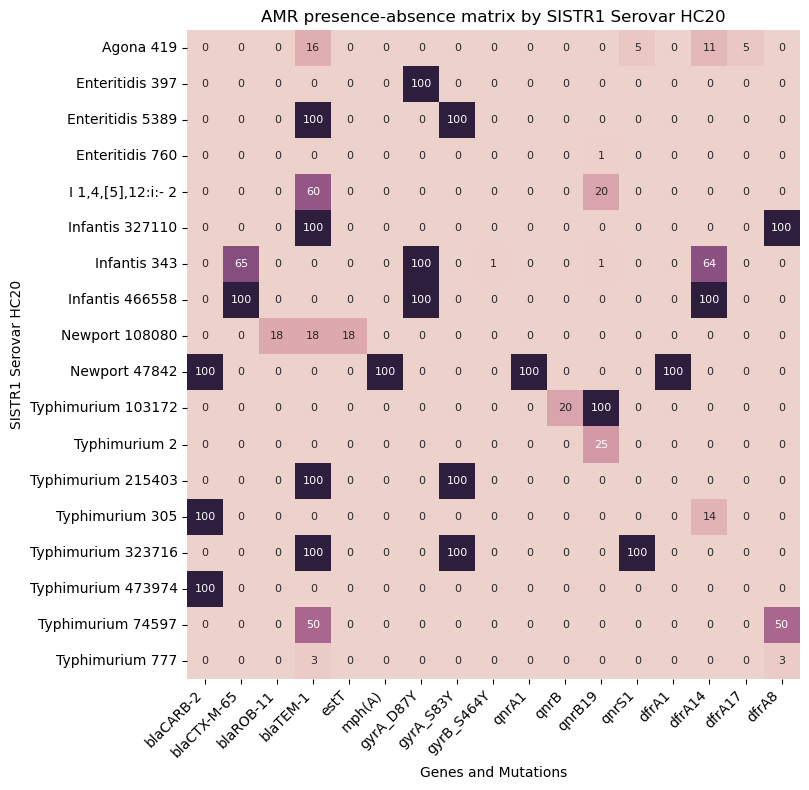

In [84]:
"""
Mapa de calor, porcentaje AMR en cluster HC de importancia
"""
HC = 'HC20'
amr_de_importancia_filtrado = amr_de_importancia_todos_genomas[amr_de_importancia_todos_genomas['SISTR1 Serovar'].isin(SEROTIPOS)]
arm_matrix_todos_los_genomas = make_matrix(amr_de_importancia_filtrado, HC)
divisors = entero_base_count['Counts'].replace(0, np.nan)
arm_matrix_todos_los_genomas = arm_matrix_todos_los_genomas.div(divisors, axis=0)
arm_matrix_todos_los_genomas_final = arm_matrix_todos_los_genomas.fillna(0)

arm_matrix_filtrado = arm_matrix_todos_los_genomas_final.loc[~(arm_matrix_todos_los_genomas_final==0).all(axis=1)]
heat_map = arm_matrix_filtrado.apply(lambda x: (x * 100).astype(int), axis=1)
plt.figure(figsize=(14, 8))
ax = sns.heatmap(heat_map, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, linecolor='#d5fcd4', square=True, annot=heat_map, fmt="d", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.title(f'AMR presence-absence matrix by SISTR1 Serovar {HC}')
plt.xlabel('Genes and Mutations')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
#plt.savefig(f'img/heatmap_{HC}_al_menos_un_AMR.png', format='png', bbox_inches='tight')
plt.show()

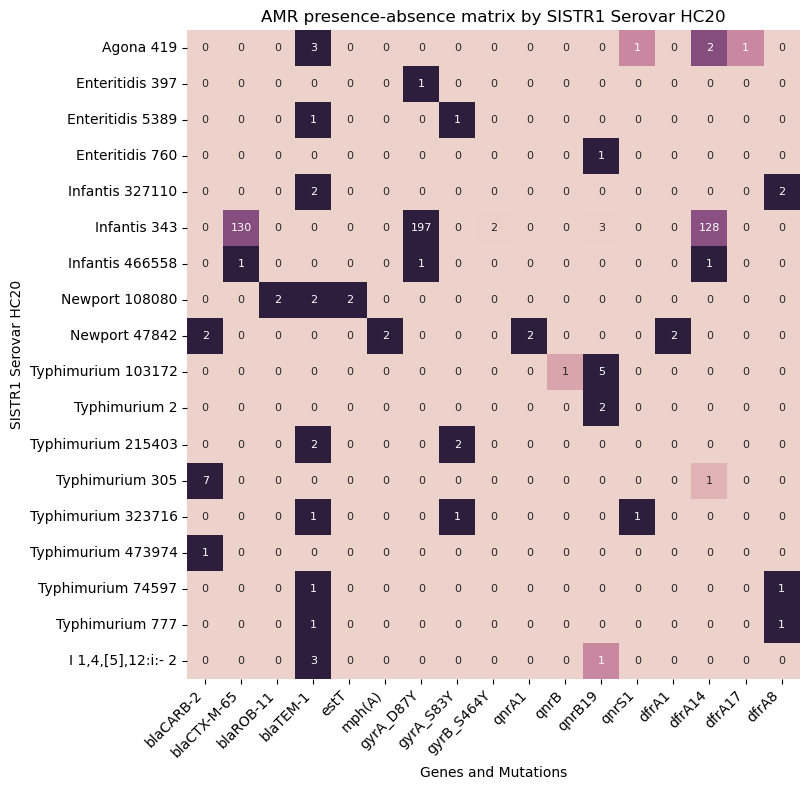

In [ ]:
"""
Mapa de calor, porcentaje AMR en cluster HC de importancia
"""
HC = 'HC20'
amr_genomas_de_importancia = amr[amr['SISTR1 Serovar'].isin(SEROTIPOS)]
amr_genomas_de_importancia = amr_genomas_de_importancia[amr_genomas_de_importancia['Class'].isin(FAMILIAS)]
arm_matrix_genomas_de_importancia = make_matrix(amr_genomas_de_importancia, HC)
heat_map = arm_matrix_genomas_de_importancia.apply(lambda x: ((x - x.min()) / (x.max() - x.min()) * 100).astype(int), axis=1)

plt.figure(figsize=(14, 8))
ax = sns.heatmap(heat_map, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, linecolor='#d5fcd4', square=True, annot=arm_matrix_genomas_de_importancia, fmt="d", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.title(f'AMR presence-absence matrix by SISTR1 Serovar {HC}')
plt.xlabel('Genes and Mutations')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
#plt.savefig(f'img/heatmap_{HC}_al_menos_un_AMR.png', format='png', bbox_inches='tight')
plt.show()

### Todos los genomas

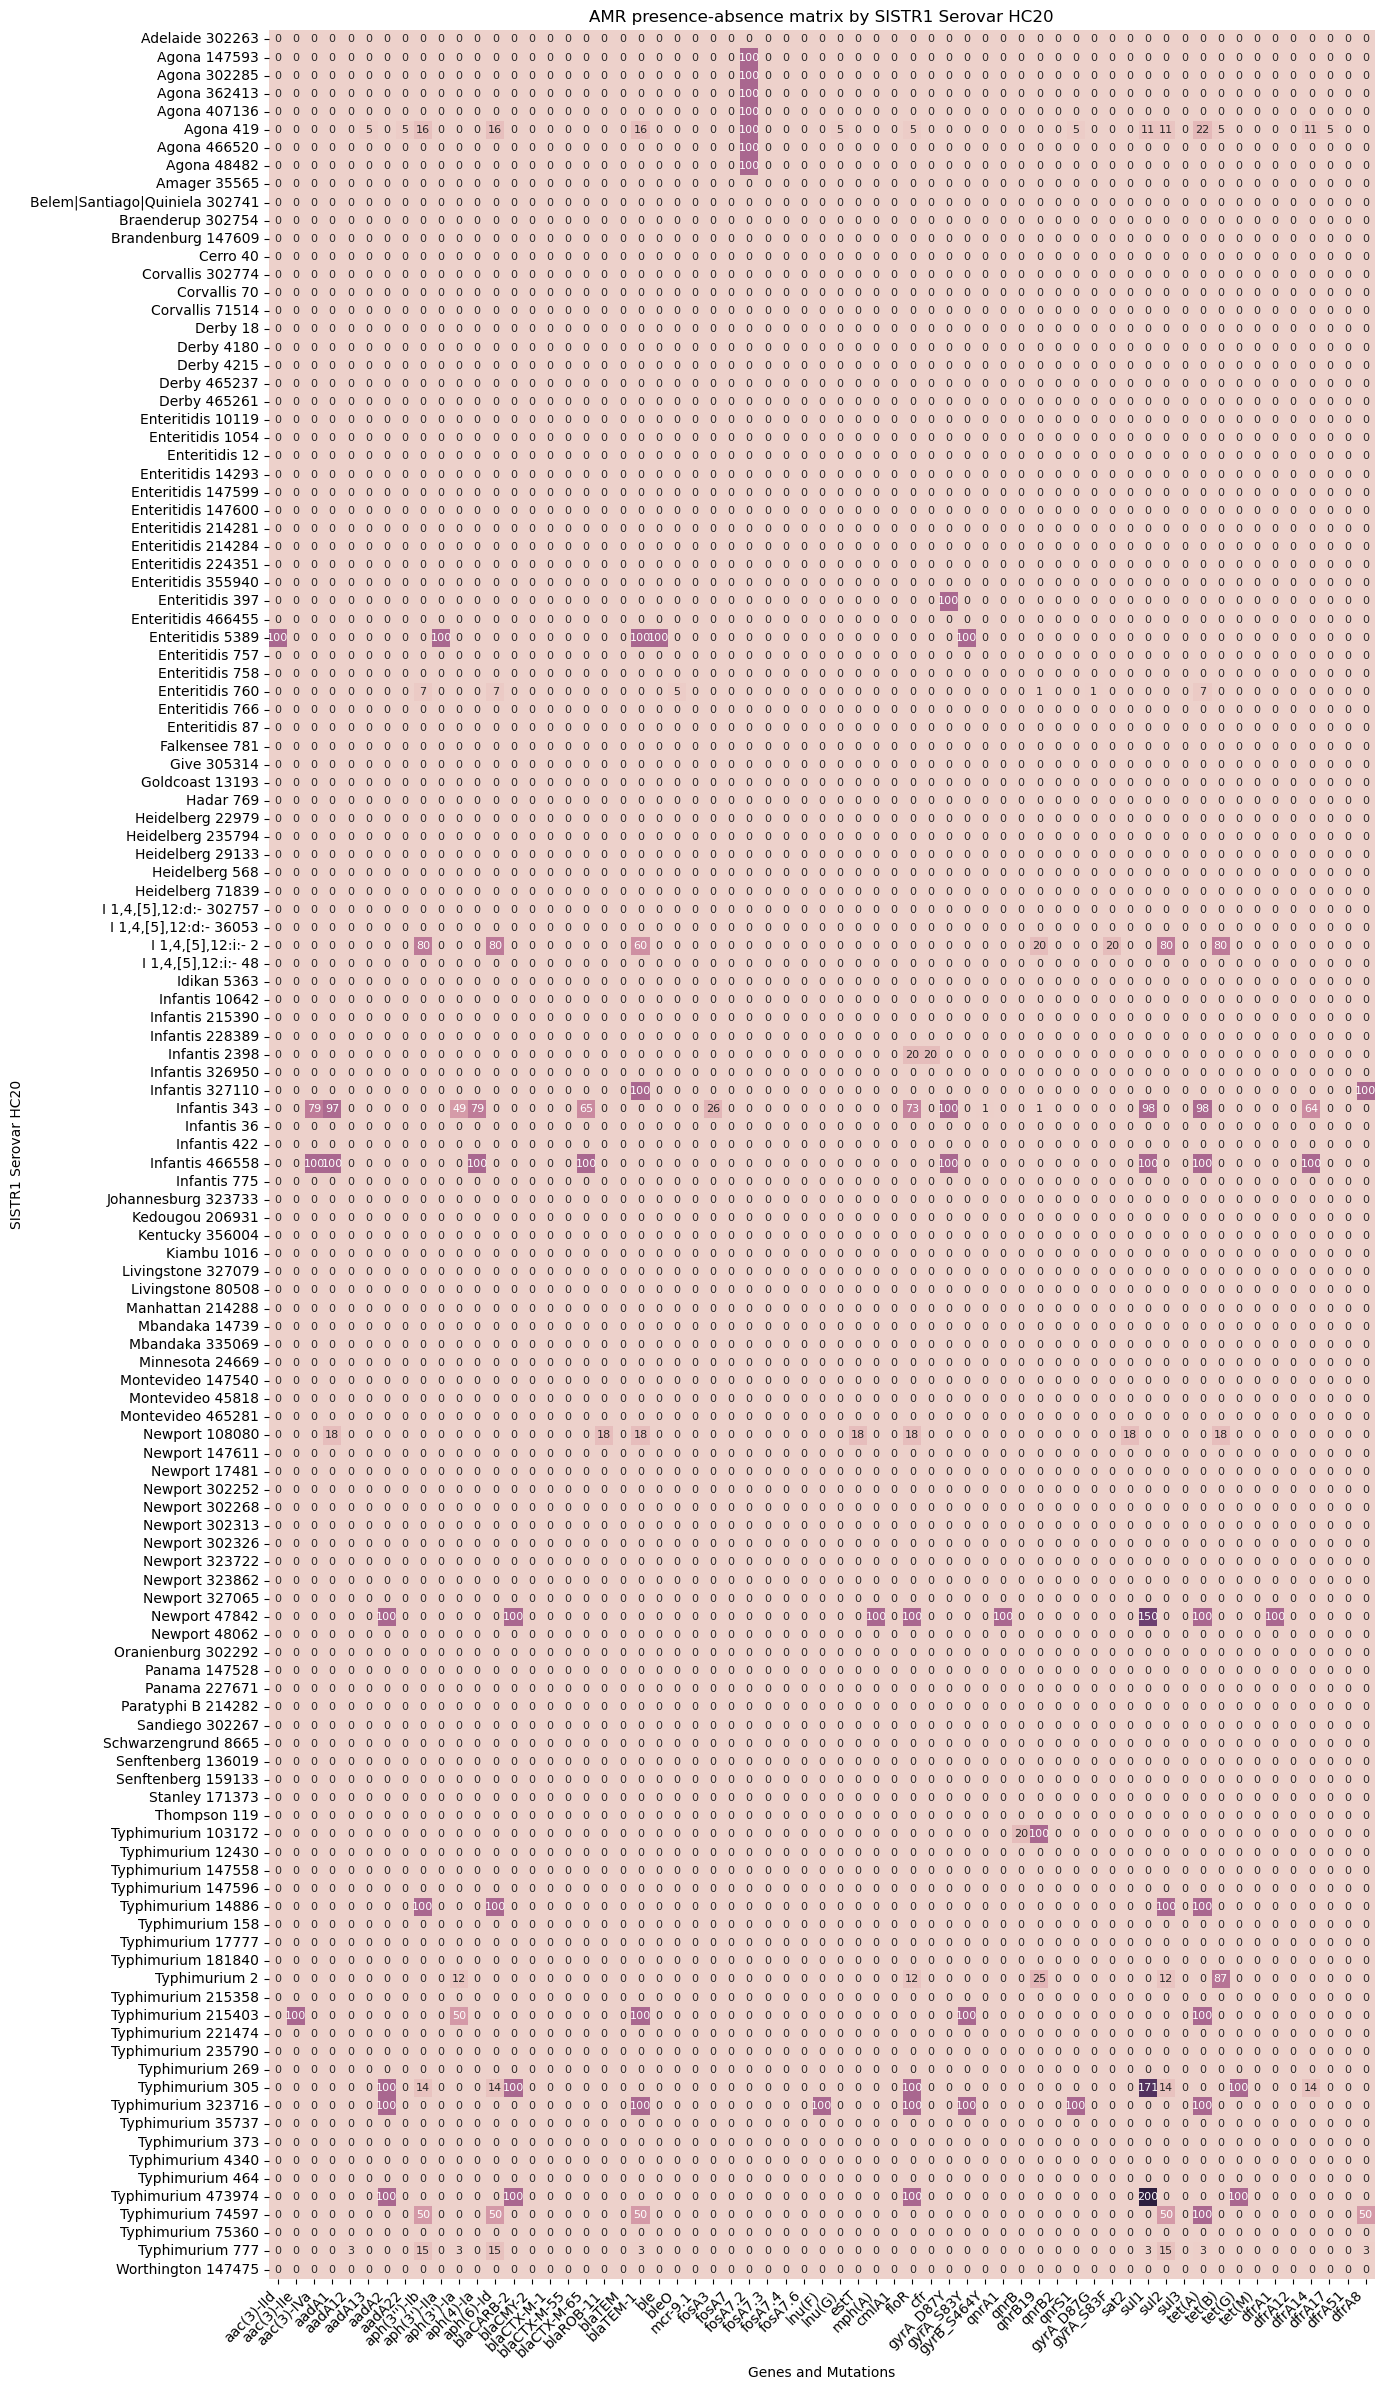

In [100]:
"""
Mapa de calor, porcentaje AMR en cluster HC de importancia
"""
HC = 'HC20'
#amr_de_importancia_filtrado = amr_de_importancia_todos_genomas[amr_de_importancia_todos_genomas['SISTR1 Serovar'].isin(SEROTIPOS)]
arm_matrix_todos_los_genomas = make_matrix(amr, HC)
divisors = entero_base_count['Counts'].replace(0, np.nan)
arm_matrix_todos_los_genomas = arm_matrix_todos_los_genomas.div(divisors, axis=0)
arm_matrix_todos_los_genomas_final = arm_matrix_todos_los_genomas.fillna(0)
arm_matrix_todos_los_genomas_final
#arm_matrix_filtrado = arm_matrix_todos_los_genomas_final.loc[~(arm_matrix_todos_los_genomas_final==0).all(axis=1)]
#arm_matrix_filtrado
heat_map = arm_matrix_todos_los_genomas_final.apply(lambda x: (x * 100).astype(int), axis=1)
heat_map
plt.figure(figsize=(26, 24))
ax = sns.heatmap(heat_map, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False, linecolor='#d5fcd4', square=True, annot=heat_map, fmt="d", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.title(f'AMR presence-absence matrix by SISTR1 Serovar {HC}')
plt.xlabel('Genes and Mutations')
plt.ylabel(f'SISTR1 Serovar {HC}')

plt.tight_layout()
#plt.savefig(f'img/heatmap_{HC}_al_menos_un_AMR.png', format='png', bbox_inches='tight')
plt.show()